<a href="https://colab.research.google.com/github/GarimaChaubey/Comparison-Analysis-of-RNN-LSTM-GRU/blob/main/RNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

# Load the IMDB dataset
# num_words=10000 means only keep the top 10,000 most frequent words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

print("Training samples:", len(x_train))
print("Test samples:", len(x_test))
print("Example review (as integers):", x_train[0])
print("Example label (0=negative, 1=positive):", y_train[0])


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 25000
Test samples: 25000
Example review (as integers): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12

In [ ]:
# Set a maximum length for all reviews
maxlen = 200

# Pad sequences to the same length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Create a Sequential model
rnn_model = Sequential()

# Embedding layer: Converts word index to dense vector
rnn_model.add(Embedding(input_dim=10000, output_dim=32, input_length=maxlen))

# Simple RNN layer with 32 units
rnn_model.add(SimpleRNN(32))

# Output layer for binary classification
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
rnn_model.build(input_shape=(None, maxlen))
rnn_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 200, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 322,113 (1.23 MB)

 Trainable params: 322,113 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model for 10 epochs
history_rnn = rnn_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.5510 - loss: 0.6805 - val_accuracy: 0.6308 - val_loss: 0.6315
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.7915 - loss: 0.4772 - val_accuracy: 0.7030 - val_loss: 0.5680
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - accuracy: 0.8928 - loss: 0.2714 - val_accuracy: 0.8186 - val_loss: 0.4419
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9712 - loss: 0.1040 - val_accuracy: 0.7988 - val_loss: 0.5659
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - accuracy: 0.9922 - loss: 0.0409 - val_accuracy: 0.8076 - val_loss: 0.6061
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - accuracy: 0.9973 - loss: 0.0164 - val_accuracy: 0.8018 - val_loss: 0.6866
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.9991 - loss: 0.0083 - val_accuracy: 0.7734 - val_loss: 0.8271
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.9981 - loss: 0.0087 - 

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7569 - loss: 0.9047
Test Accuracy: 0.7589


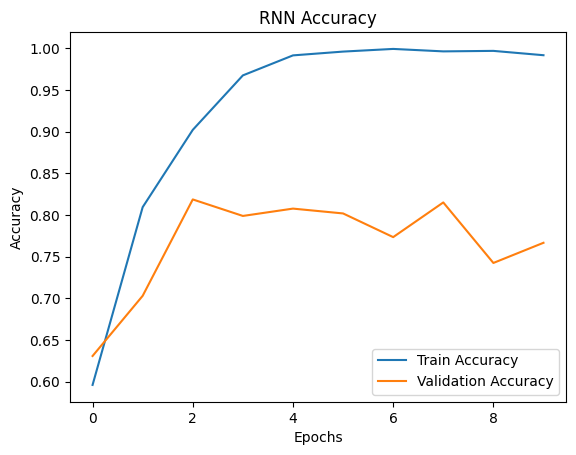

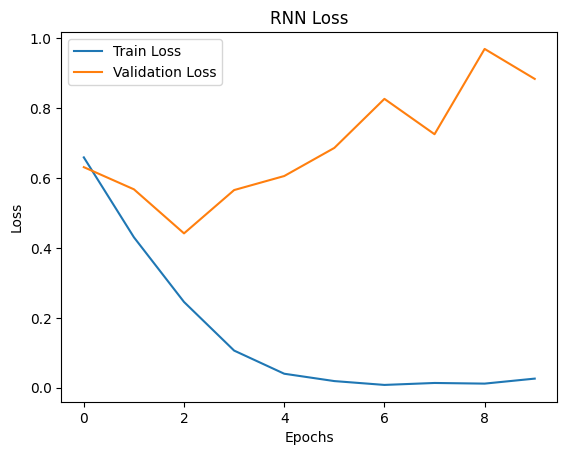

In [ ]:
# Evaluate on test data
test_loss, test_acc = rnn_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot accuracy and loss
plt.plot(history_rnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_rnn.history['loss'], label='Train Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('RNN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## LSTM Model

In [ ]:
from tensorflow.keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=10000, output_dim=32, input_length=maxlen))
lstm_model.add(LSTM(32))  # Change here
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lstm_model.build(input_shape=(None, maxlen))
lstm_model.summary()




Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 200, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,353 (1.25 MB)

 Trainable params: 328,353 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train
history_lstm = lstm_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 100ms/step - accuracy: 0.7074 - loss: 0.5525 - val_accuracy: 0.8696 - val_loss: 0.3266
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 98ms/step - accuracy: 0.9048 - loss: 0.2516 - val_accuracy: 0.8698 - val_loss: 0.3115
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 102ms/step - accuracy: 0.9379 - loss: 0.1765 - val_accuracy: 0.8698 - val_loss: 0.3192
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 93ms/step - accuracy: 0.9556 - loss: 0.1259 - val_accuracy: 0.8440 - val_loss: 0.3790
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 97ms/step - accuracy: 0.9512 - loss: 0.1300 - val_accuracy: 0.8734 - val_loss: 0.4170
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 101ms/step - accuracy: 0.9710 - loss: 0.0833 - val_accuracy: 0.8644 - val_loss: 0.3918
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 107ms/step - accuracy: 0.9791 - loss: 0.0627 - val_accuracy: 0.8674 - val_loss: 0.4721
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 96ms/step - accuracy: 0.9820 - loss: 0.056

## GRU Model

In [ ]:
from tensorflow.keras.layers import GRU

gru_model = Sequential()
gru_model.add(Embedding(input_dim=10000, output_dim=32, input_length=maxlen))
gru_model.add(GRU(32))  # Change here
gru_model.add(Dense(1, activation='sigmoid'))
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

gru_model.build(input_shape=(None, maxlen))
gru_model.summary()



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 200, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 32)                  │           6,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 326,369 (1.24 MB)

 Trainable params: 326,369 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train
history_gru = gru_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 147ms/step - accuracy: 0.6720 - loss: 0.5749 - val_accuracy: 0.8546 - val_loss: 0.3521
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 130ms/step - accuracy: 0.9026 - loss: 0.2546 - val_accuracy: 0.8740 - val_loss: 0.3250
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 134ms/step - accuracy: 0.9220 - loss: 0.2047 - val_accuracy: 0.8690 - val_loss: 0.3460
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 137ms/step - accuracy: 0.9434 - loss: 0.1554 - val_accuracy: 0.8662 - val_loss: 0.3948
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 131ms/step - accuracy: 0.9557 - loss: 0.1292 - val_accuracy: 0.8608 - val_loss: 0.4266
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 135ms/step - accuracy: 0.9678 - loss: 0.0952 - val_accuracy: 0.8650 - val_loss: 0.4601
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 134ms/step - accuracy: 0.9792 - loss: 0.0687 - val_accuracy: 0.8566 - val_loss: 0.4855
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 133ms/step - accuracy: 0.9772 - loss: 0

## Comparison and Analysis

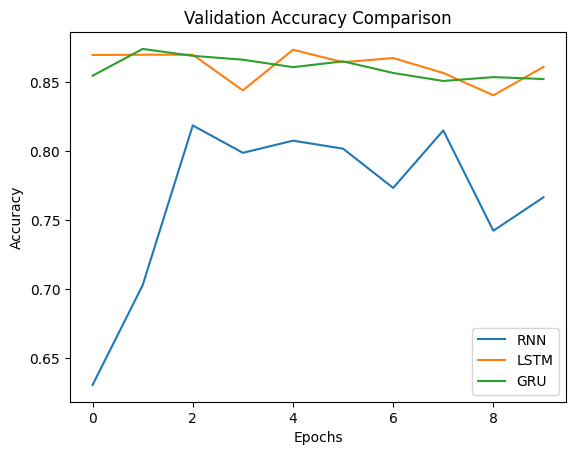

In [ ]:
def plot_all_models(histories, labels):
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_accuracy'], label=label)
    plt.title("Validation Accuracy Comparison")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

plot_all_models([history_rnn, history_lstm, history_gru], ["RNN", "LSTM", "GRU"])


## Observation

The graph shows that GRU and LSTM consistently outperform the basic RNN in terms of validation accuracy. While RNN begins with lower accuracy and fluctuates more, LSTM and GRU maintain higher and more stable accuracy across epochs. This demonstrates the superiority of LSTM and GRU in capturing long-term dependencies in sequential data such as text.

After training and evaluating RNN, LSTM, and GRU models on a sequence prediction task, we observed the following:

**Accuracy:**

- LSTM and GRU achieved higher and more stable accuracy than RNN.

- RNN showed decent performance initially but struggled to retain accuracy over longer sequences due to vanishing gradient issues.

**Convergence Speed:**

- LSTM and GRU converged faster and more smoothly compared to RNN.

- GRU showed the fastest convergence while maintaining good accuracy, owing to its simpler structure.

**Training Time:**

- RNN trained the fastest due to its minimal structure.

- LSTM had the longest training time because of its complex gates and memory cells.

- GRU had balanced training time, faster than LSTM but slower than RNN.

**Stability on Long Sequences:**

- RNN performance degraded on longer sequences.

- Both LSTM and GRU remained stable and retained important context across long inputs.